<a href="https://colab.research.google.com/github/Aaryant31/Bike-Sharing-Demand-Prediction/blob/main/Rahul_Kumar_soni_Notebook_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [53]:
# import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

In [54]:
data='https://raw.githubusercontent.com/Aaryant31/Bike-Sharing-Demand-Prediction/main/SeoulBikeData.csv'

In [55]:
df = pd.read_csv(data, encoding = "ISO-8859-1")

In [56]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [58]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [59]:
df['Date']= pd.to_datetime(df['Date'])

In [60]:
numeric_features= df.select_dtypes(exclude='object')

In [61]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 752.9 KB


In [62]:
categorical_features= df.select_dtypes(include='object')

In [63]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [64]:
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [65]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [66]:
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [67]:
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,0,1,1,1,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,0,0,1,1,1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,0,0,1,1,1,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,0,0,1,1,1,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,0,0,1,1,1,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


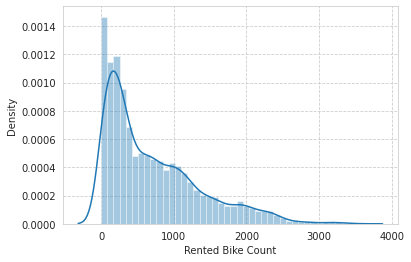

In [68]:
sns.distplot(final_df['Rented Bike Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


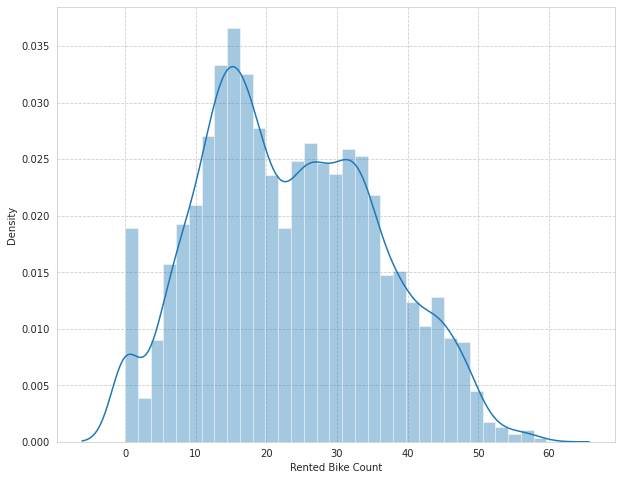

In [69]:
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(final_df['Rented Bike Count']))

In [70]:
num_feature=list(numeric_features.columns)

In [71]:
num_feature

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [72]:
num_feature.remove('Rented Bike Count')


In [73]:
num_feature.remove('Date')

In [74]:
cat_features=list(categorical_features.columns)

In [75]:
cat_features

['Seasons', 'Holiday', 'Functioning Day']

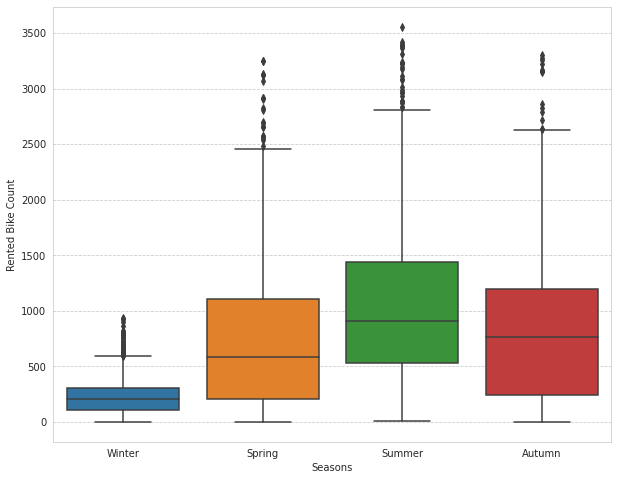

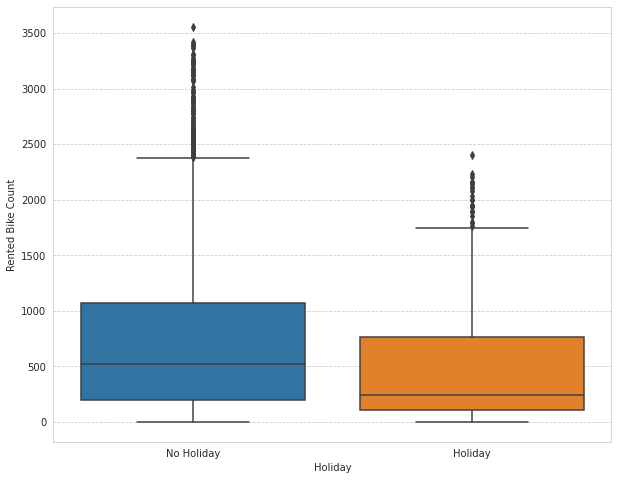

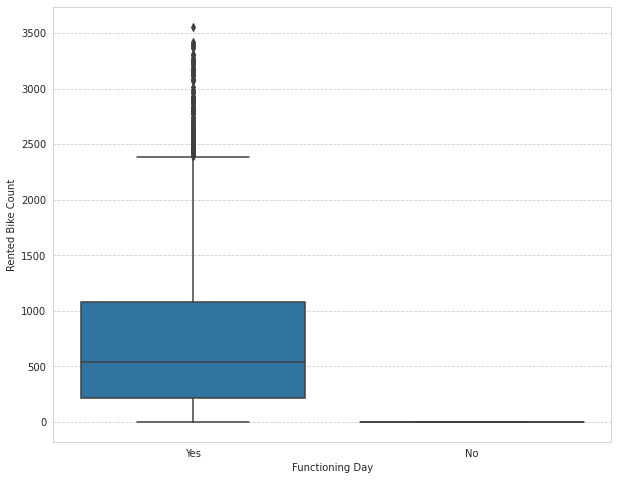

In [76]:
for col in cat_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

In [77]:
final_df['Functioning Day_Yes'].value_counts()

1    8465
0     295
Name: Functioning Day_Yes, dtype: int64

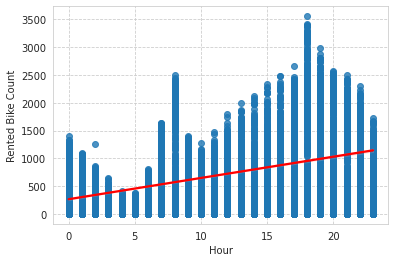

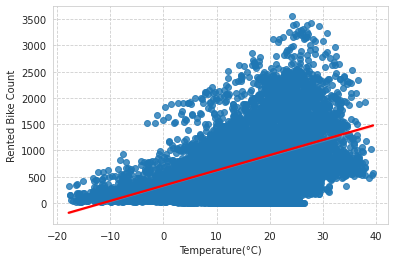

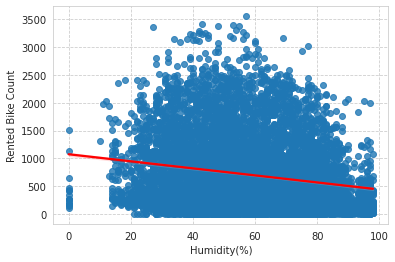

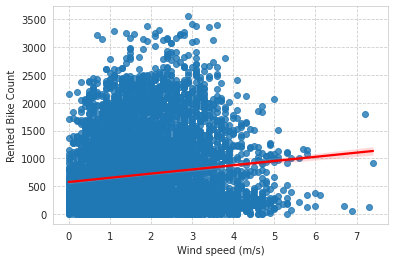

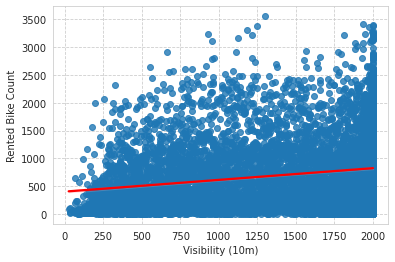

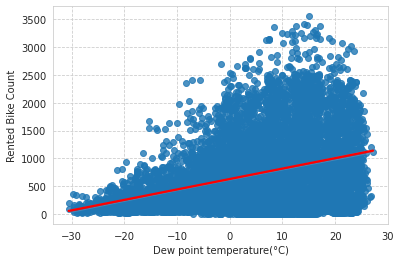

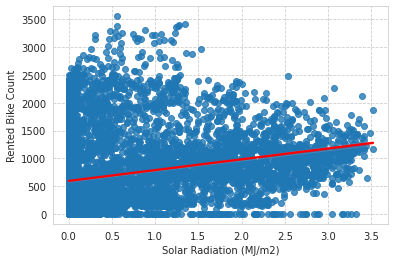

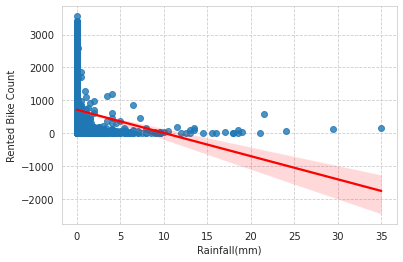

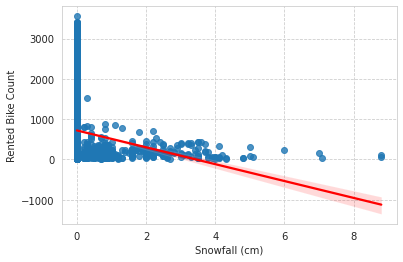

In [78]:
for col in num_feature:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

In [79]:
# create new day,month, hour info from Pickup time
final_df['Date']=pd.to_datetime(final_df['Date'])
# final_df['day'] = final_df['Date'].apply(lambda x : x.day)
final_df['day']=final_df['Date'].dt.dayofweek
final_df['month'] = final_df['Date'].apply(lambda x : x.month)
final_df['day_of_week'] = final_df['Date'].dt.day_name()

In [80]:
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day,month,day_of_week
0,0,0,1,1,1,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,Thursday
1,0,0,1,1,1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,Thursday
2,0,0,1,1,1,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,Thursday
3,0,0,1,1,1,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,Thursday
4,0,0,1,1,1,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,Thursday


In [81]:
final_df['weekdays/weekend']=final_df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x == 'Sunday' else 0)

In [82]:
final_df.drop('day_of_week',axis=1,inplace=True)

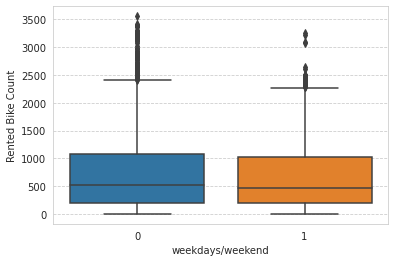

In [83]:
sns.boxplot(x=final_df['weekdays/weekend'],y=final_df['Rented Bike Count'])

In [84]:
final_df['weekdays/weekend'].value_counts()

0    6216
1    2544
Name: weekdays/weekend, dtype: int64

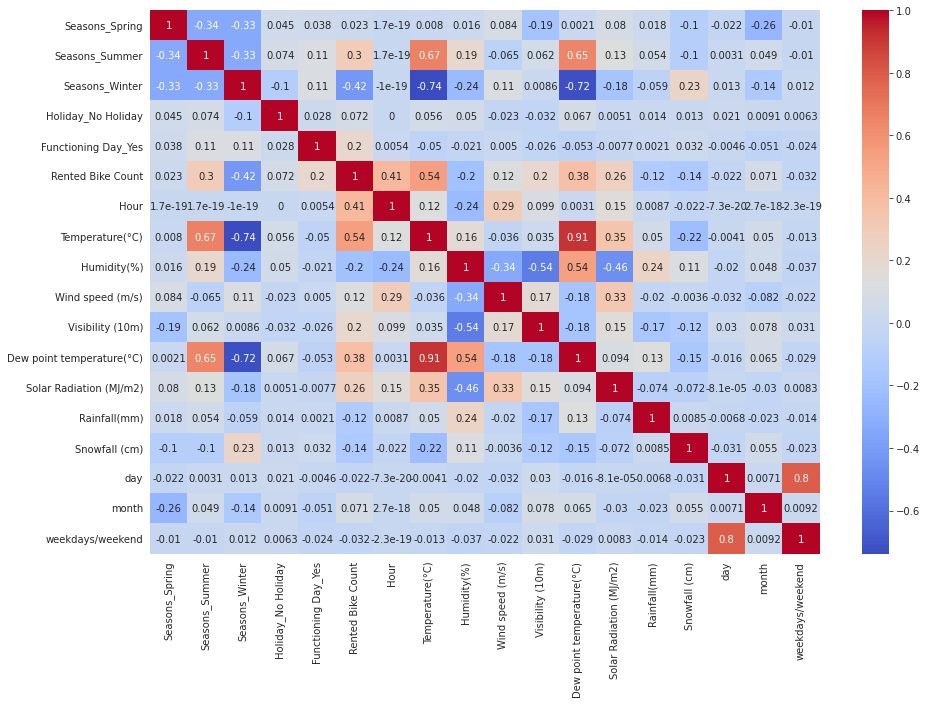

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(final_df.corr(),cmap='coolwarm',annot=True)

In [86]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [87]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Holiday_No Holiday','Humidity(%)','Functioning Day_Yes'] ]])


,variables,VIF
0,Seasons_Spring,1.802250
1,Seasons_Summer,3.257723
2,Seasons_Winter,3.008000
3,Hour,4.303985
4,Temperature(°C),8.364688
5,Wind speed (m/s),4.789573
6,Visibility (10m),6.068145
7,Solar Radiation (MJ/m2),1.952451
8,Rainfall(mm),1.050393
9,Snowfall (cm),1.113306


In [88]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count','Dew point temperature(°C)','Holiday_No Holiday','Humidity(%)','Functioning Day_Yes','Date'],axis=1)

In [89]:
y=np.sqrt(final_df['Rented Bike Count'])

In [90]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [91]:
# scaling data
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [94]:
# appying linearRegression
from sklearn.linear_model import LinearRegression

In [95]:
linear_model= LinearRegression()

In [96]:
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
y_pred=linear_model.predict(X_test)

In [98]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
MSE  = mean_squared_error(y_test**2,y_pred**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test**2,y_pred**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test**2,y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 224920.44877716832
RMSE : 474.25778726043956
R2 : 0.45292565366348303
Adjusted R2 :  0.4496572867046712


#creating function to run diffirent model

In [99]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    MSE  = mean_squared_error(y_test**2,y_pred**2)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test**2,y_pred**2)
    print("R2 :" ,r2)
    print("Adjusted R2 : ",1-(1-r2_score(y_test**2,y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
    

# Linear Regresseion

In [100]:
run_model(linear_model,X_train,y_train,X_test,y_test)

MSE : 224920.44877716832
RMSE : 474.25778726043956
R2 : 0.45292565366348303
Adjusted R2 :  0.4496572867046712


# Polynomial Regression

In [101]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [102]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

In [103]:
run_model(pipe,X_train,y_train,X_test,y_test)

MSE : 224920.44877716832
RMSE : 474.25778726043956
R2 : 0.45292565366348303
Adjusted R2 :  0.4496572867046712


# KNN Regression


In [104]:
from sklearn.neighbors import KNeighborsRegressor